In [16]:
# import required libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [17]:
# load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
names = ['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
         'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
         'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
dataset = pd.read_csv(url, names=names)

In [25]:
dataset

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [26]:
eigenvalues = pca.explained_variance_
print("Eigenvalues of the retained principal components:\n", eigenvalues)


Eigenvalues of the retained principal components:
 [4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627]


In [27]:
sum(eigenvalues)

12.029864272097052

In [28]:
(eigenvalues[0]+eigenvalues[1]+eigenvalues[2]+eigenvalues[3]+eigenvalues[4])/sum(eigenvalues)

0.8711631387849638

In [29]:
# apply PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4'])

# combine the transformed data with class labels
finalDf = pd.concat([principalDf, dataset[['class']]], axis=1)

# print the transformed dataset
print("Transformed dataset with 4 principal components:\n", finalDf.head())

Transformed dataset with 4 principal components:
         PC1       PC2       PC3       PC4  class
0  3.316751 -1.443463 -0.165739 -0.215631      1
1  2.209465  0.333393 -2.026457 -0.291358      1
2  2.516740 -1.031151  0.982819  0.724902      1
3  3.757066 -2.756372 -0.176192  0.567983      1
4  1.008908 -0.869831  2.026688 -0.409766      1


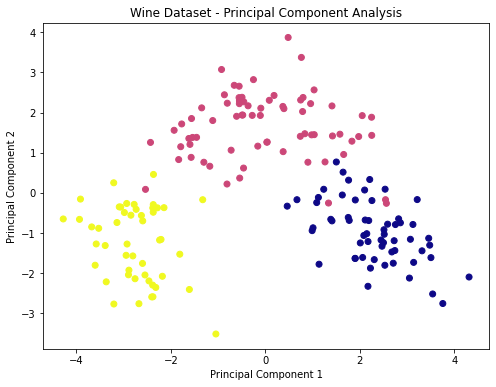

In [30]:

# plot the principal components
plt.figure(figsize=(8,6))
plt.scatter(principalDf['PC1'], principalDf['PC2'], c=dataset['class'], cmap='plasma')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Wine Dataset - Principal Component Analysis')
plt.show()